In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read covid data
* Cumulative new cases
* Cumulative new deaths

In [2]:
covid_confirmed = pd.read_csv('./time_series_covid19_confirmed_US.csv')
covid_deaths = pd.read_csv('./time_series_covid19_deaths_US.csv')
#covid_confirmed.head()


### Data Cleanup
* Drop miscellaneous columns


In [3]:
covid_confirmed = covid_confirmed.drop(columns=['UID','iso3','iso2','Long_','code3','FIPS','Country_Region','Lat'])
covid_deaths = covid_deaths.drop(columns=['UID','iso3','iso2','Long_','code3','FIPS','Country_Region','Lat'])

# covid_confirmed.head()

### Data Cleanup
* Select New Mexico Data set
* Remove data (Unassigned, Admin2 and Province_State) and use the Combined_key as the primary key

In [4]:
New_Mexico_confirmed = covid_confirmed[covid_confirmed['Province_State']=='New Mexico']

New_Mexico_confirmed = New_Mexico_confirmed[New_Mexico_confirmed['Admin2'] != 'Out of NM']
New_Mexico_confirmed = New_Mexico_confirmed[New_Mexico_confirmed['Admin2'] != 'Unassigned']
New_Mexico_confirmed = New_Mexico_confirmed.drop(columns=['Admin2', 'Province_State'])

New_Mexico_confirmed = New_Mexico_confirmed.set_index('Combined_Key')

In [5]:
New_Mexico_deaths = covid_deaths[covid_deaths['Province_State']=='New Mexico']

New_Mexico_deaths = New_Mexico_deaths[New_Mexico_deaths['Admin2'] != 'Out of NM']
New_Mexico_deaths = New_Mexico_deaths[New_Mexico_deaths['Admin2'] != 'Unassigned']
New_Mexico_deaths = New_Mexico_deaths.drop(columns=['Admin2', 'Province_State'])

New_Mexico_deaths = New_Mexico_deaths.set_index('Combined_Key')
#print(New_Mexico_confirmed)

### Transpose Dataset

In [6]:
New_Mexico_confirmed = New_Mexico_confirmed.transpose()

New_Mexico_deaths = New_Mexico_deaths.transpose()


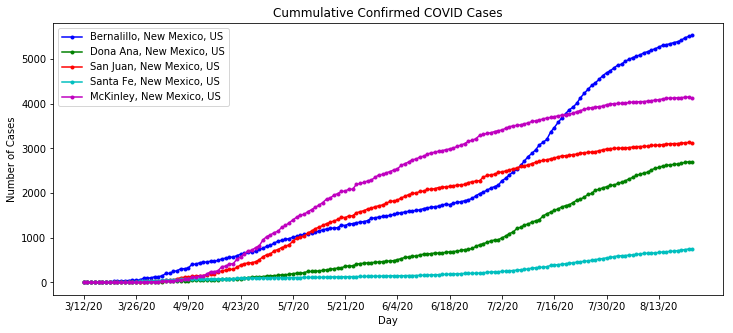

In [7]:
# A
dropped_samples=50
Bernalillo_confirmed = New_Mexico_confirmed['Bernalillo, New Mexico, US'][dropped_samples:]
DonaAna_confirmed = New_Mexico_confirmed['Dona Ana, New Mexico, US'][dropped_samples:]
SanJuan_confirmed = New_Mexico_confirmed['San Juan, New Mexico, US'][dropped_samples:]
SantaFe_confirmed = New_Mexico_confirmed['Santa Fe, New Mexico, US'][dropped_samples:]
McKinley_confirmed = New_Mexico_confirmed['McKinley, New Mexico, US'][dropped_samples:]


# print(Bernalillo_confirmed
plt.figure(figsize=(12,5))
plt.title('Cummulative Confirmed COVID Cases')

plt.plot(Bernalillo_confirmed,'b.-')
plt.plot(DonaAna_confirmed,'g.-')
plt.plot(SanJuan_confirmed,'r.-')
plt.plot(SantaFe_confirmed,'c.-')
plt.plot(McKinley_confirmed,'m.-')
plt.xticks(Bernalillo_confirmed.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()


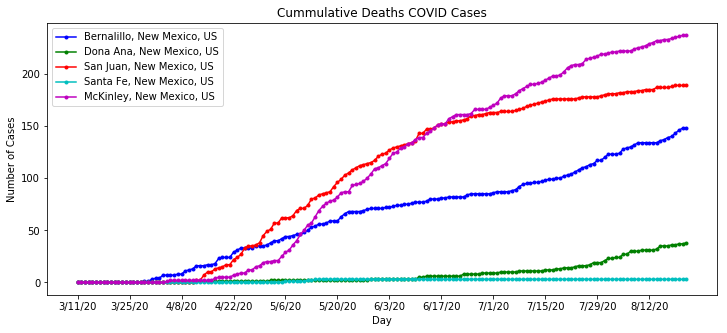

In [8]:
# A
dropped_samples=50
Bernalillo_deaths = New_Mexico_deaths['Bernalillo, New Mexico, US'][dropped_samples:]
DonaAna_deaths = New_Mexico_deaths['Dona Ana, New Mexico, US'][dropped_samples:]
SanJuan_deaths = New_Mexico_deaths['San Juan, New Mexico, US'][dropped_samples:]
SantaFe_deaths = New_Mexico_deaths['Santa Fe, New Mexico, US'][dropped_samples:]
McKinley_deaths = New_Mexico_deaths['McKinley, New Mexico, US'][dropped_samples:]


# print(Bernalillo_deaths
plt.figure(figsize=(12,5))
plt.title('Cummulative Deaths COVID Cases')

plt.plot(Bernalillo_deaths,'b.-')
plt.plot(DonaAna_deaths,'g.-')
plt.plot(SanJuan_deaths,'r.-')
plt.plot(SantaFe_deaths,'c.-')
plt.plot(McKinley_deaths,'m.-')
plt.xticks(Bernalillo_deaths.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()


### Compute Number of New Cases Each Day

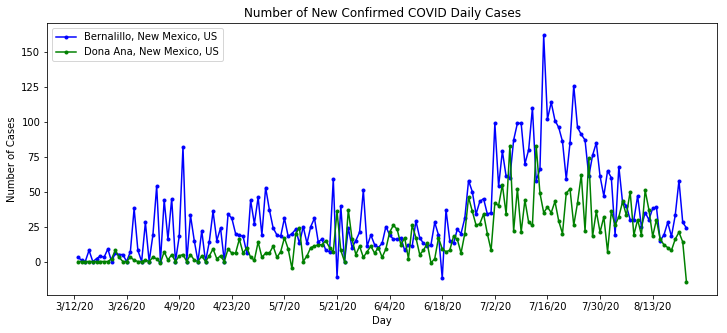

In [9]:
# B
diff_Bernalillo_confirmed = Bernalillo_confirmed.diff()
diff_DonaAna_confirmed = DonaAna_confirmed.diff()
diff_SanJuan_confirmed = SanJuan_confirmed.diff()
diff_SantaFe_confirmed = SantaFe_confirmed.diff()
diff_McKinley_confirmed = McKinley_confirmed.diff()



plt.figure(figsize=(12,5))
plt.title('Number of New Confirmed COVID Daily Cases')

plt.plot(diff_Bernalillo_confirmed,'b.-')
plt.plot(diff_DonaAna_confirmed,'g.-')
#plt.plot(diff_SanJuan_confirmed,'r.-')
#plt.plot(diff_SantaFe_confirmed,'c.-')
#plt.plot(diff_McKinley_confirmed,'m.-')
plt.xticks(diff_Bernalillo_confirmed.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()



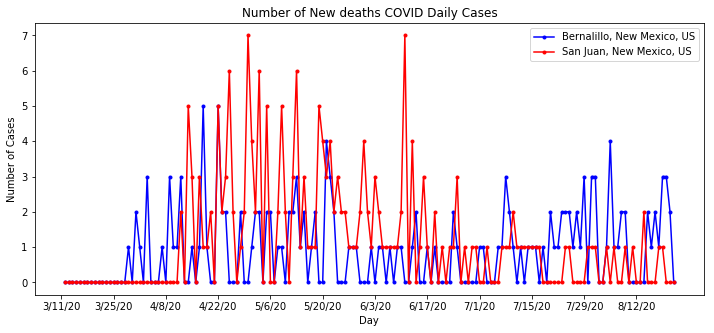

In [10]:
# B 
diff_Bernalillo_deaths = Bernalillo_deaths.diff()
diff_DonaAna_deaths = DonaAna_deaths.diff()
diff_SanJuan_deaths = SanJuan_deaths.diff()
diff_SantaFe_deaths = SantaFe_deaths.diff()
diff_McKinley_deaths = McKinley_deaths.diff()



plt.figure(figsize=(12,5))
plt.title('Number of New deaths COVID Daily Cases')

plt.plot(diff_Bernalillo_deaths,'b.-')
#plt.plot(diff_DonaAna_deaths,'g.-')
plt.plot(diff_SanJuan_deaths,'r.-')
#plt.plot(diff_SantaFe_deaths,'c.-')
#plt.plot(diff_McKinley_deaths,'m.-')
plt.xticks(diff_Bernalillo_deaths.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()




### Compute Simple Moving Average to Obtain Average New Case Trend 

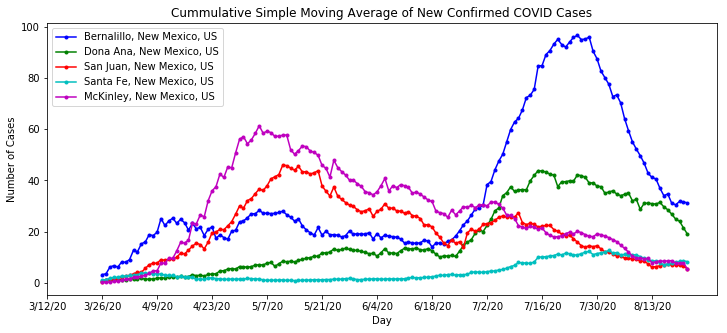

In [11]:
# C
window=14
rolling_diff_Bernalillo_confirmed = diff_Bernalillo_confirmed.rolling(window=window).mean()
rolling_diff_DonaAna_confirmed = diff_DonaAna_confirmed.rolling(window=window).mean()
rolling_diff_SanJuan_confirmed = diff_SanJuan_confirmed.rolling(window=window).mean()
rolling_diff_SantaFe_confirmed = diff_SantaFe_confirmed.rolling(window=window).mean()
rolling_diff_McKinley_confirmed = diff_McKinley_confirmed.rolling(window=window).mean()



plt.figure(figsize=(12,5))
plt.title('Cummulative Simple Moving Average of New Confirmed COVID Cases')

plt.plot(rolling_diff_Bernalillo_confirmed,'b.-')
plt.plot(rolling_diff_DonaAna_confirmed,'g.-')
plt.plot(rolling_diff_SanJuan_confirmed,'r.-')
plt.plot(rolling_diff_SantaFe_confirmed,'c.-')
plt.plot(rolling_diff_McKinley_confirmed,'m.-')
plt.xticks(diff_Bernalillo_confirmed.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()

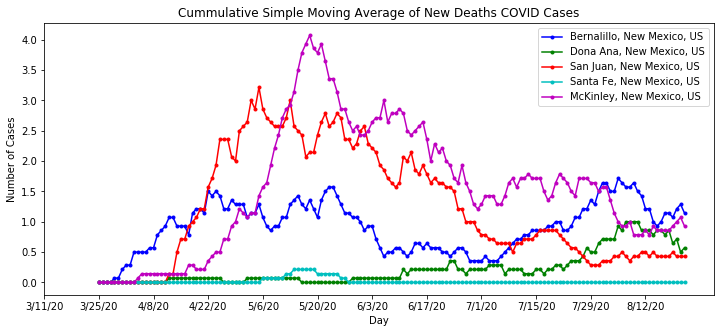

In [12]:
# C
window=14
rolling_diff_Bernalillo_deaths = diff_Bernalillo_deaths.rolling(window=window).mean()
rolling_diff_DonaAna_deaths = diff_DonaAna_deaths.rolling(window=window).mean()
rolling_diff_SanJuan_deaths = diff_SanJuan_deaths.rolling(window=window).mean()
rolling_diff_SantaFe_deaths = diff_SantaFe_deaths.rolling(window=window).mean()
rolling_diff_McKinley_deaths = diff_McKinley_deaths.rolling(window=window).mean()



plt.figure(figsize=(12,5))
plt.title('Cummulative Simple Moving Average of New Deaths COVID Cases')

plt.plot(rolling_diff_Bernalillo_deaths,'b.-')
plt.plot(rolling_diff_DonaAna_deaths,'g.-')
plt.plot(rolling_diff_SanJuan_deaths,'r.-')
plt.plot(rolling_diff_SantaFe_deaths,'c.-')
plt.plot(rolling_diff_McKinley_deaths,'m.-')
plt.xticks(diff_Bernalillo_deaths.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()

### Compute Simple Moving Average for Cummulative New Cases

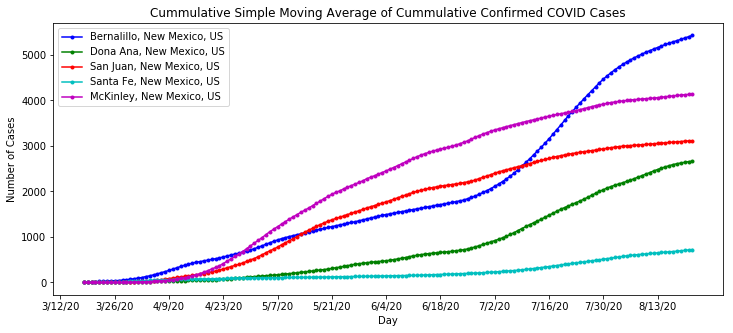

In [13]:
# D
window=7
rolling_Bernalillo_confirmed = Bernalillo_confirmed.rolling(window=window).mean()
rolling_DonaAna_confirmed = DonaAna_confirmed.rolling(window=window).mean()
rolling_SanJuan_confirmed = SanJuan_confirmed.rolling(window=window).mean()
rolling_SantaFe_confirmed = SantaFe_confirmed.rolling(window=window).mean()
rolling_McKinley_confirmed = McKinley_confirmed.rolling(window=window).mean()



plt.figure(figsize=(12,5))
plt.title('Cummulative Simple Moving Average of Cummulative Confirmed COVID Cases')

plt.plot(rolling_Bernalillo_confirmed,'b.-')
plt.plot(rolling_DonaAna_confirmed,'g.-')
plt.plot(rolling_SanJuan_confirmed,'r.-')
plt.plot(rolling_SantaFe_confirmed,'c.-')
plt.plot(rolling_McKinley_confirmed,'m.-')
plt.xticks(diff_Bernalillo_confirmed.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()

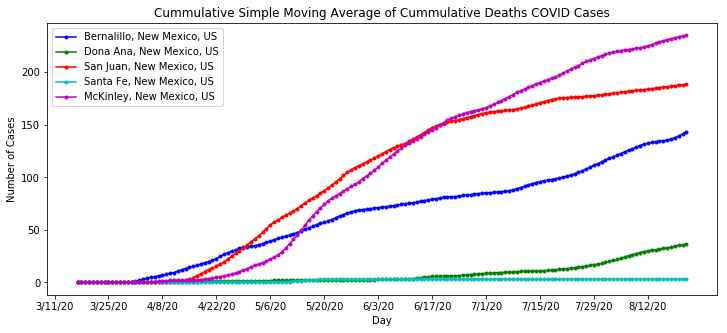

In [14]:
# D
window=7
rolling_Bernalillo_deaths = Bernalillo_deaths.rolling(window=window).mean()
rolling_DonaAna_deaths = DonaAna_deaths.rolling(window=window).mean()
rolling_SanJuan_deaths = SanJuan_deaths.rolling(window=window).mean()
rolling_SantaFe_deaths = SantaFe_deaths.rolling(window=window).mean()
rolling_McKinley_deaths = McKinley_deaths.rolling(window=window).mean()



plt.figure(figsize=(12,5))
plt.title('Cummulative Simple Moving Average of Cummulative Deaths COVID Cases')

plt.plot(rolling_Bernalillo_deaths,'b.-')
plt.plot(rolling_DonaAna_deaths,'g.-')
plt.plot(rolling_SanJuan_deaths,'r.-')
plt.plot(rolling_SantaFe_deaths,'c.-')
plt.plot(rolling_McKinley_deaths,'m.-')
plt.xticks(diff_Bernalillo_deaths.index[::14].tolist())

plt.xlabel('Day')
plt.ylabel('Number of Cases')



plt.legend()
plt.show()